In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.utils import Bunch
import seaborn as sns

In [79]:
login_data = pd.read_json('logins.json') # Not sure if this json file can be read like a csv so pd.read_json is used.

In [80]:
login_data.head() # This is the first 5 timestamps.

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [81]:
login_data.info() # The time stamps are datatime objects; datetime64[ns].

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


# Part 1: EDA

In [82]:
login_data.reset_index(inplace=True, drop=True)
login_data.set_index('login_time', inplace=True)

In [83]:
login_data.head() # Now the index of this dataframe is the head.  Assigning another column to the dataframe and broadcasting the count as 1.

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [84]:
login_data['count'] = 1

In [85]:
login_data.head() # Now the index can be grouped into fifteen minute intervals.

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [86]:
login_data_aggregate_15 = login_data.resample('15T').sum() # This will bin the index of datetime objects into 15 minute intervals.
login_data_aggregate_15.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [87]:
login_data_aggregate_15.info() # Entry amount is reduced about 10X.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


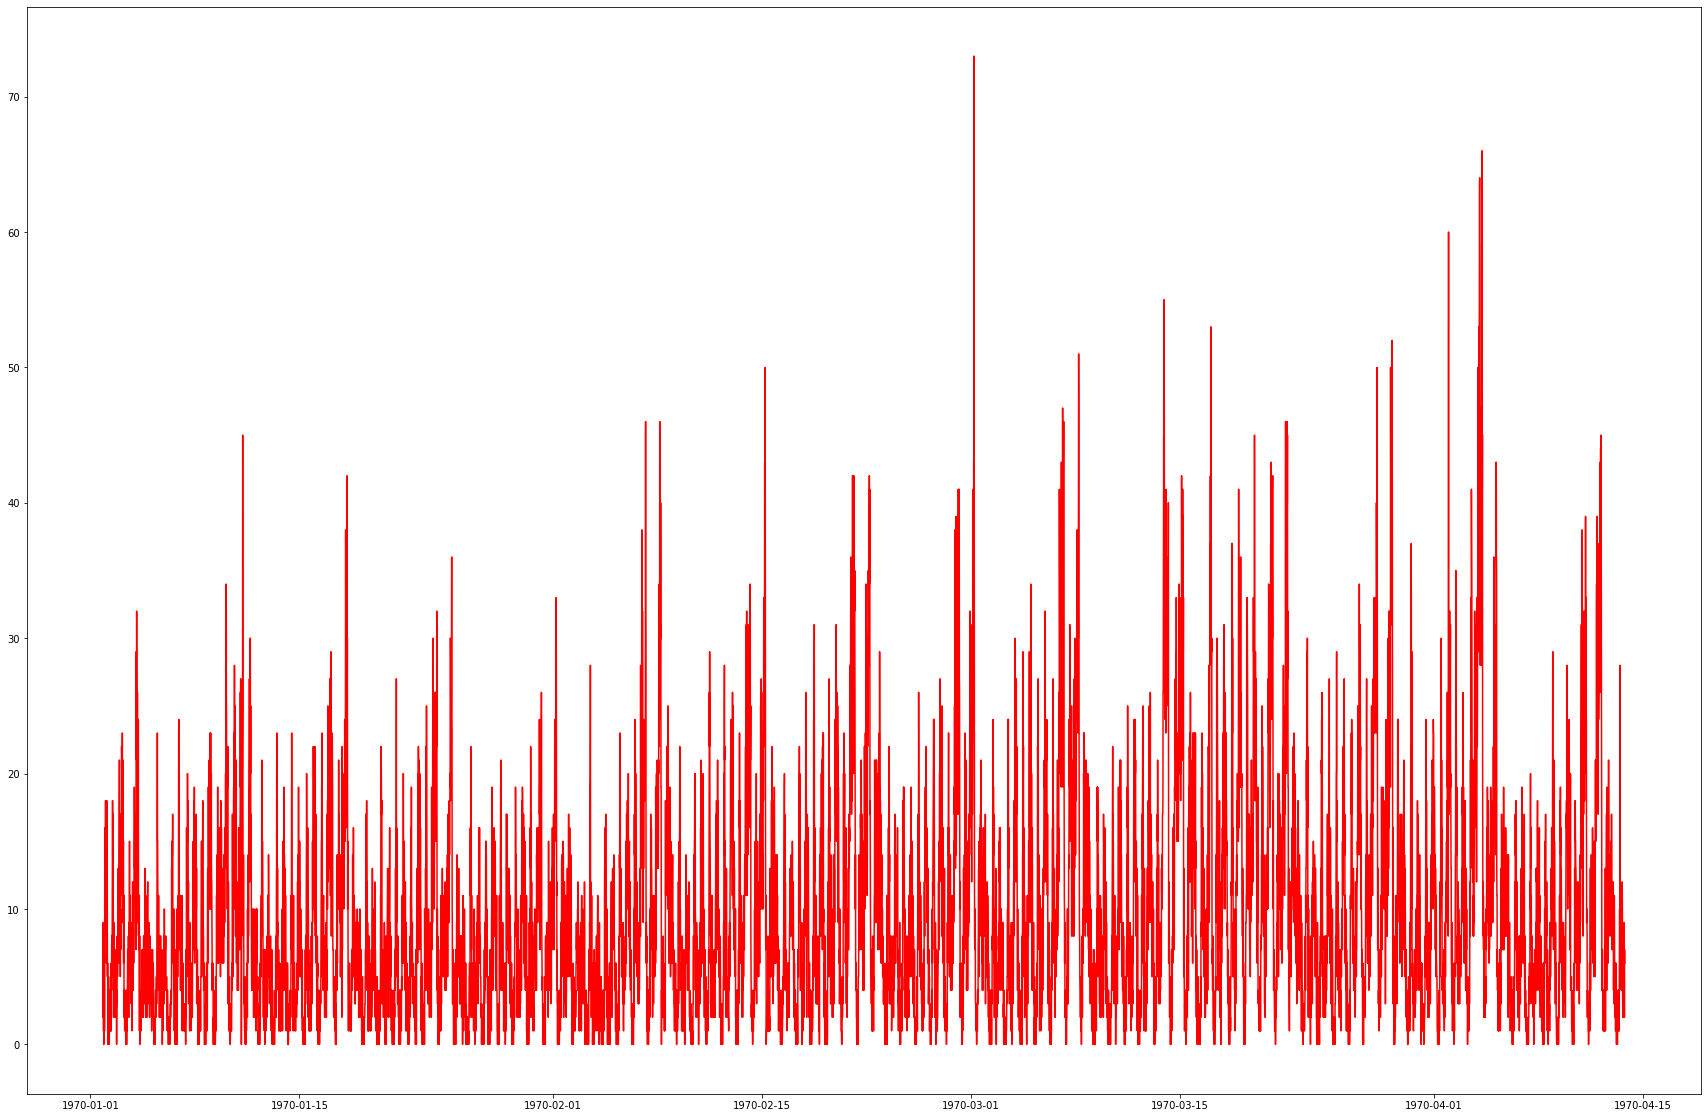

In [88]:
plt.figure(figsize = (30, 20))
plt.plot(login_data_aggregate_15, color='r')

In [89]:
login_data_day = login_data.resample("D").count() # Resampling the data by the day
login_data_day.head()

,count
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


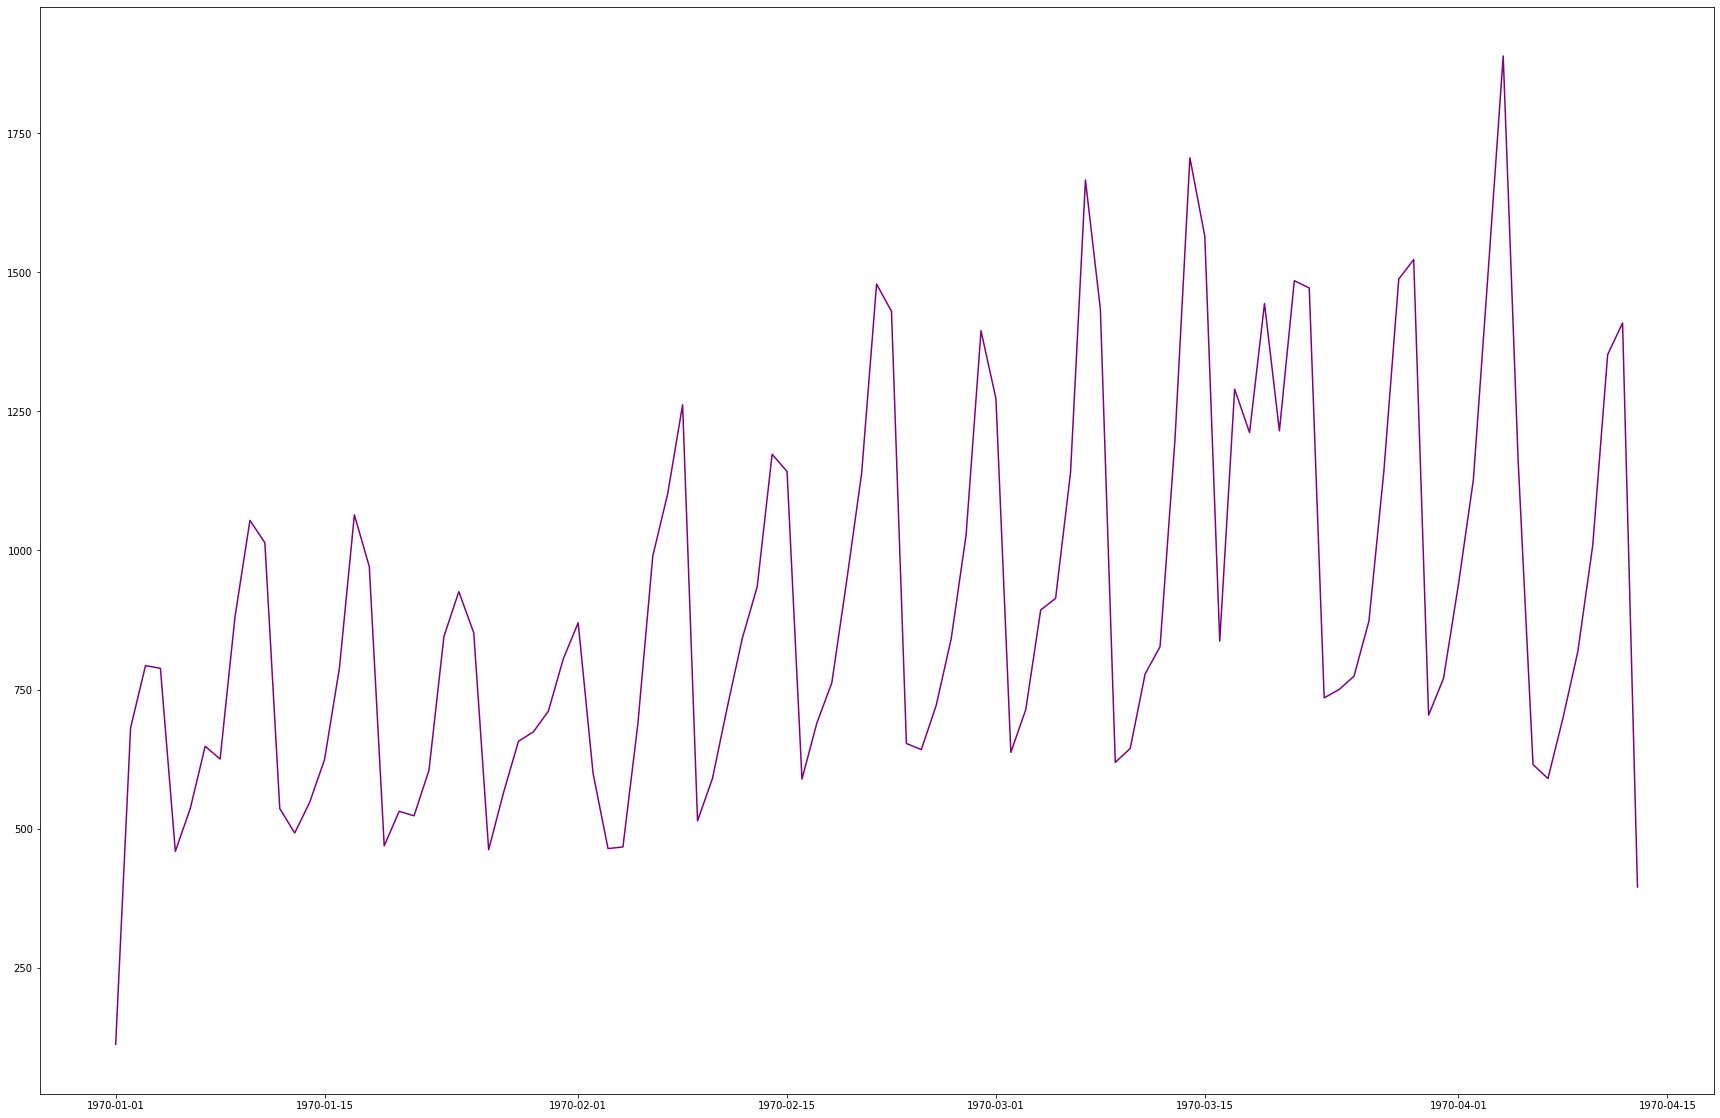

In [90]:
plt.figure(figsize = (30, 20))
plt.plot(login_data_day, color='purple')

In [91]:
login_data_week = login_data.resample("W").count() # Resampling the data by the week
login_data_week.head()

,count
login_time,
1970-01-04,2374
1970-01-11,5217
1970-01-18,5023
1970-01-25,4751
1970-02-01,4744


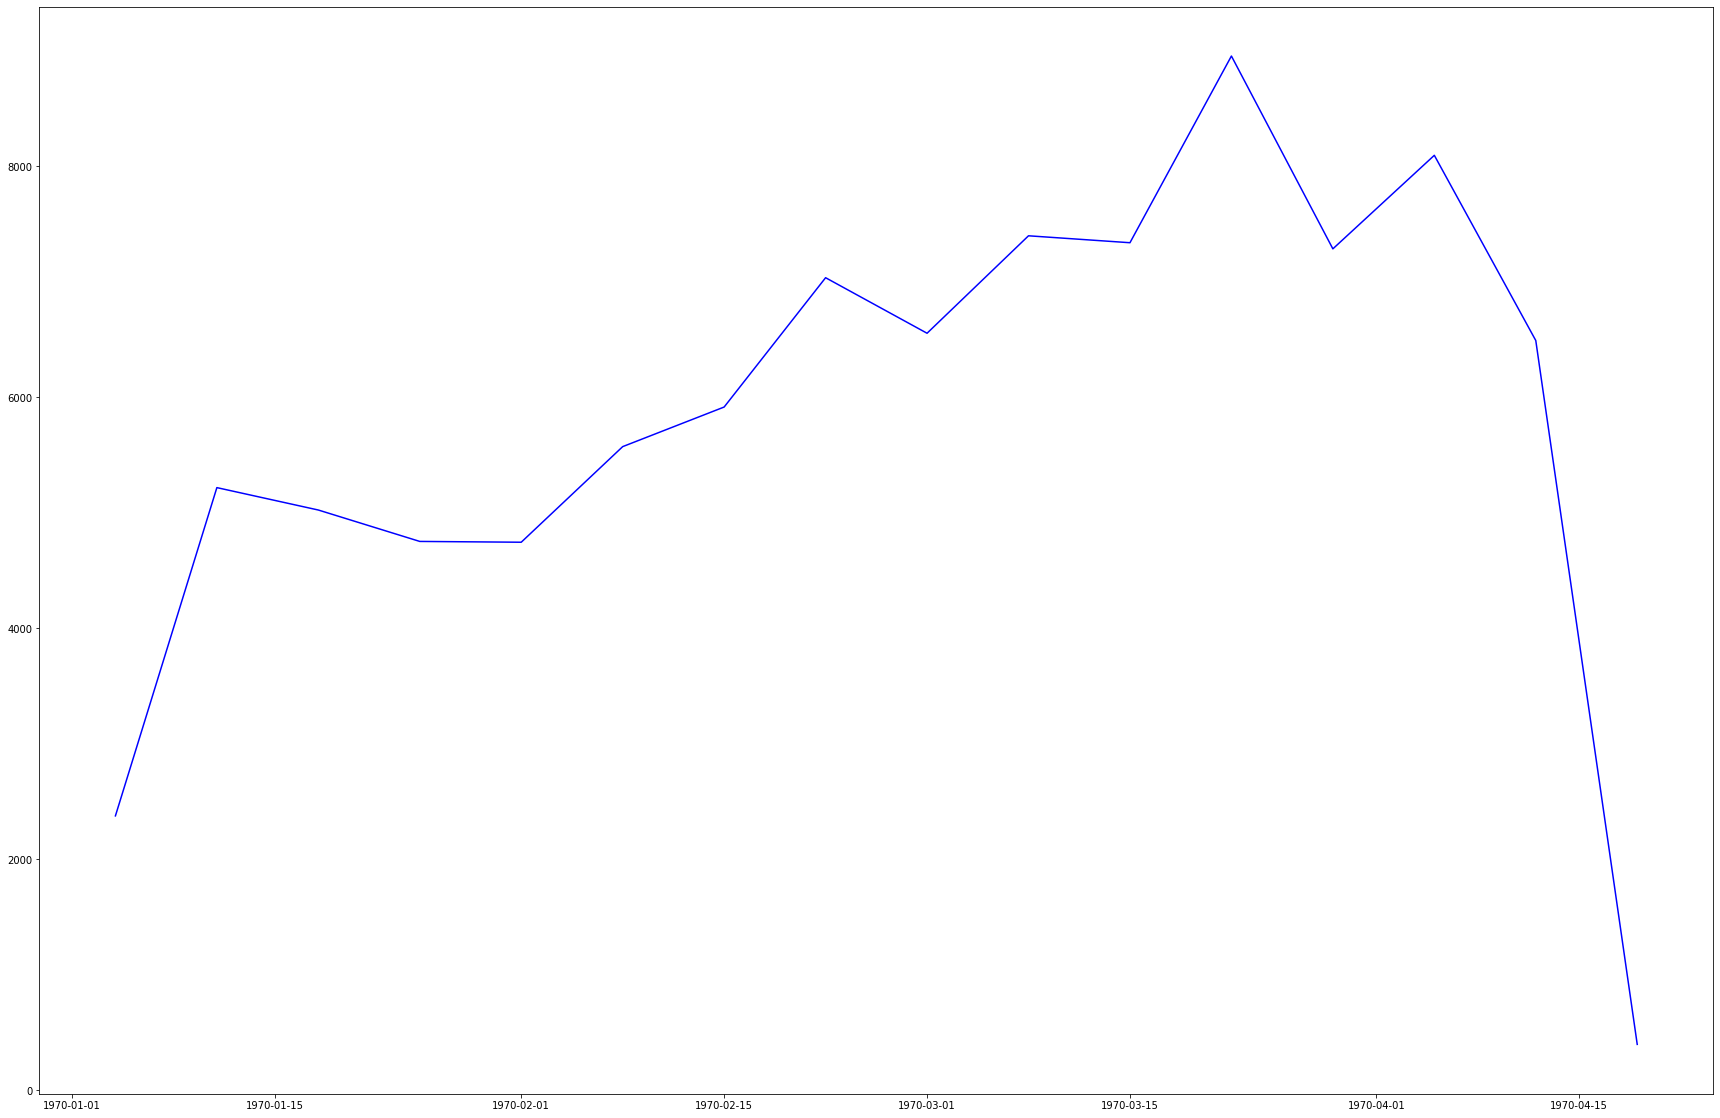

In [92]:
plt.figure(figsize = (30, 20))
plt.plot(login_data_week, color='blue') 

In [93]:
login_data_month = login_data.resample("M").count() # Resampling the data by the month
login_data_month

,count
login_time,
1970-01-31,21239
1970-02-28,24673
1970-03-31,33723
1970-04-30,13507


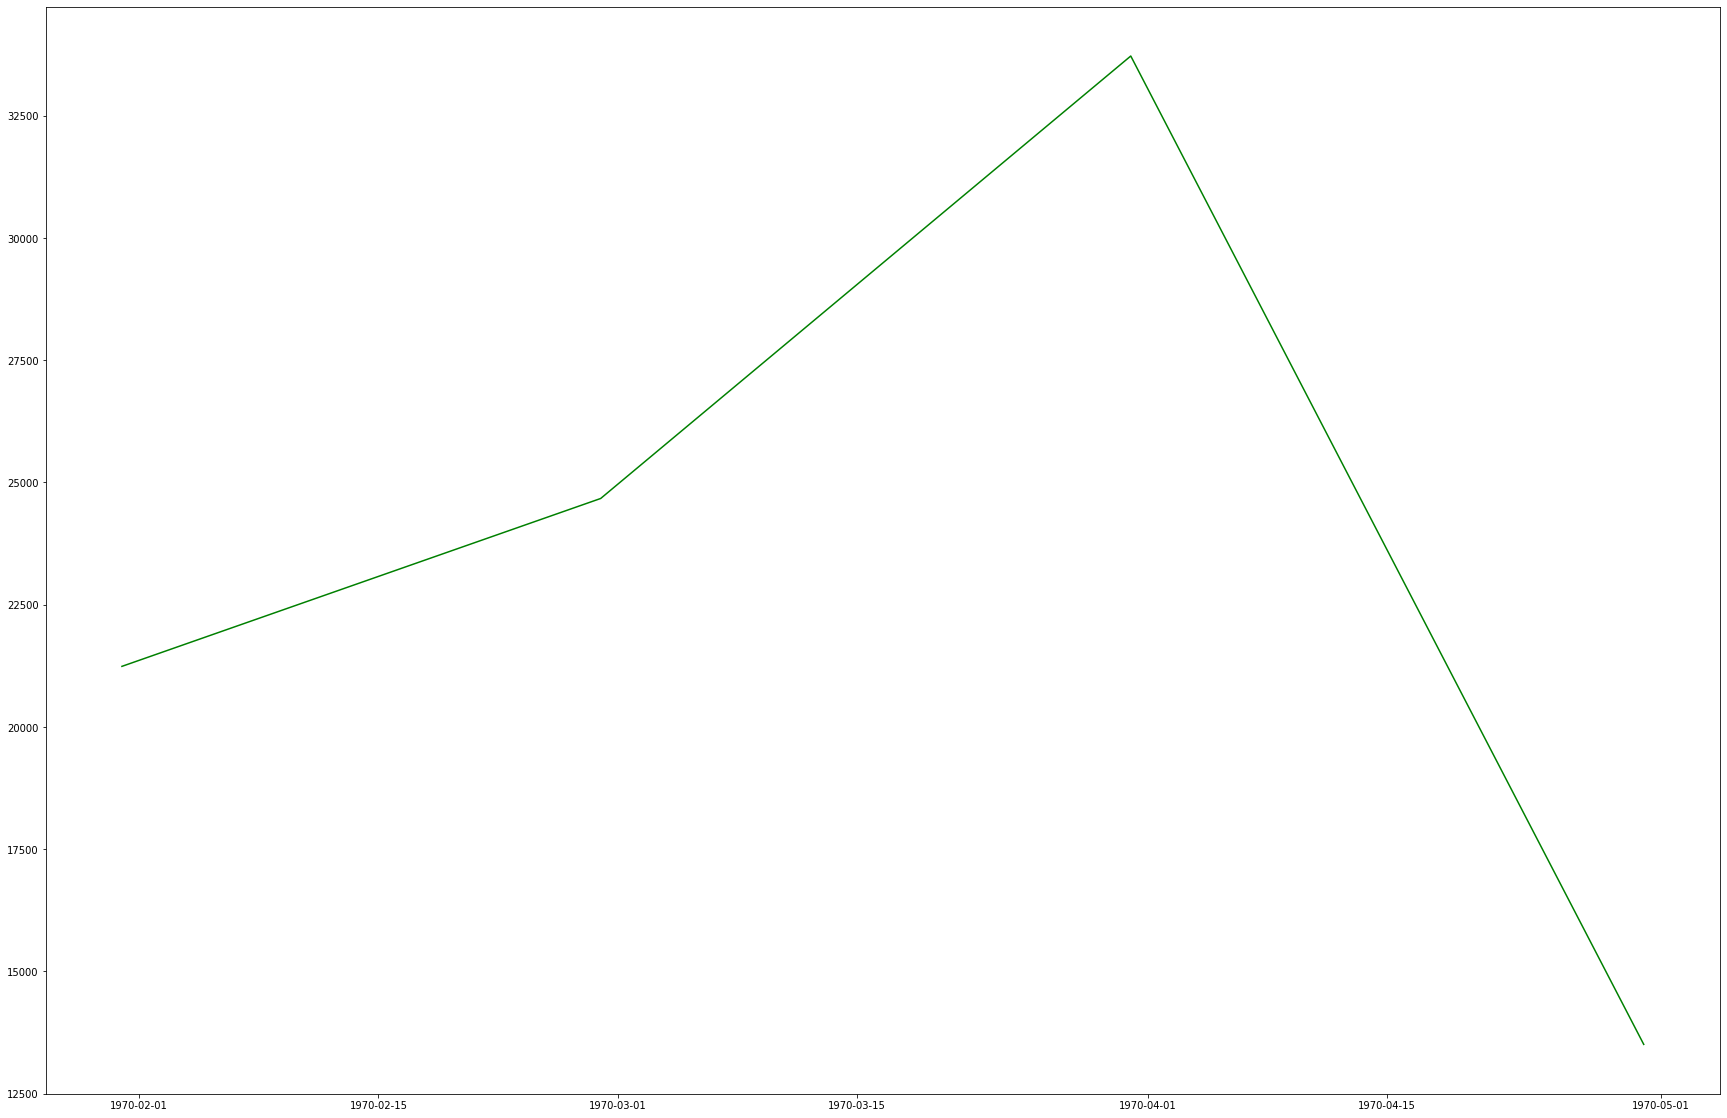

In [94]:
plt.figure(figsize = (30, 20))
plt.plot(login_data_month, color='green') 

There are periodic observations for the plots where the timestamps have been resampled into days and 15 minute intervals.  No periodic observation is seen when the timestamps are resampled with higher time intervals.  Within the 15 minute intervals, there are periods within periods throught.  The first month was sampled and graph to magnify these periods.

In [95]:
login_data_Jan = login_data.loc['Jan, 1970']
login_data_Jan.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [96]:
login_data_Jan.tail() # This shows that login_data_Jan is the subsampled data for the month of January

,count
login_time,
1970-01-31 23:45:10,1
1970-01-31 23:49:15,1
1970-01-31 23:55:59,1
1970-01-31 23:56:30,1
1970-01-31 23:55:38,1


In [97]:
login_data_Jan_agg_15 = login_data_Jan.resample('15T').sum()
login_data_Jan_agg_15.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


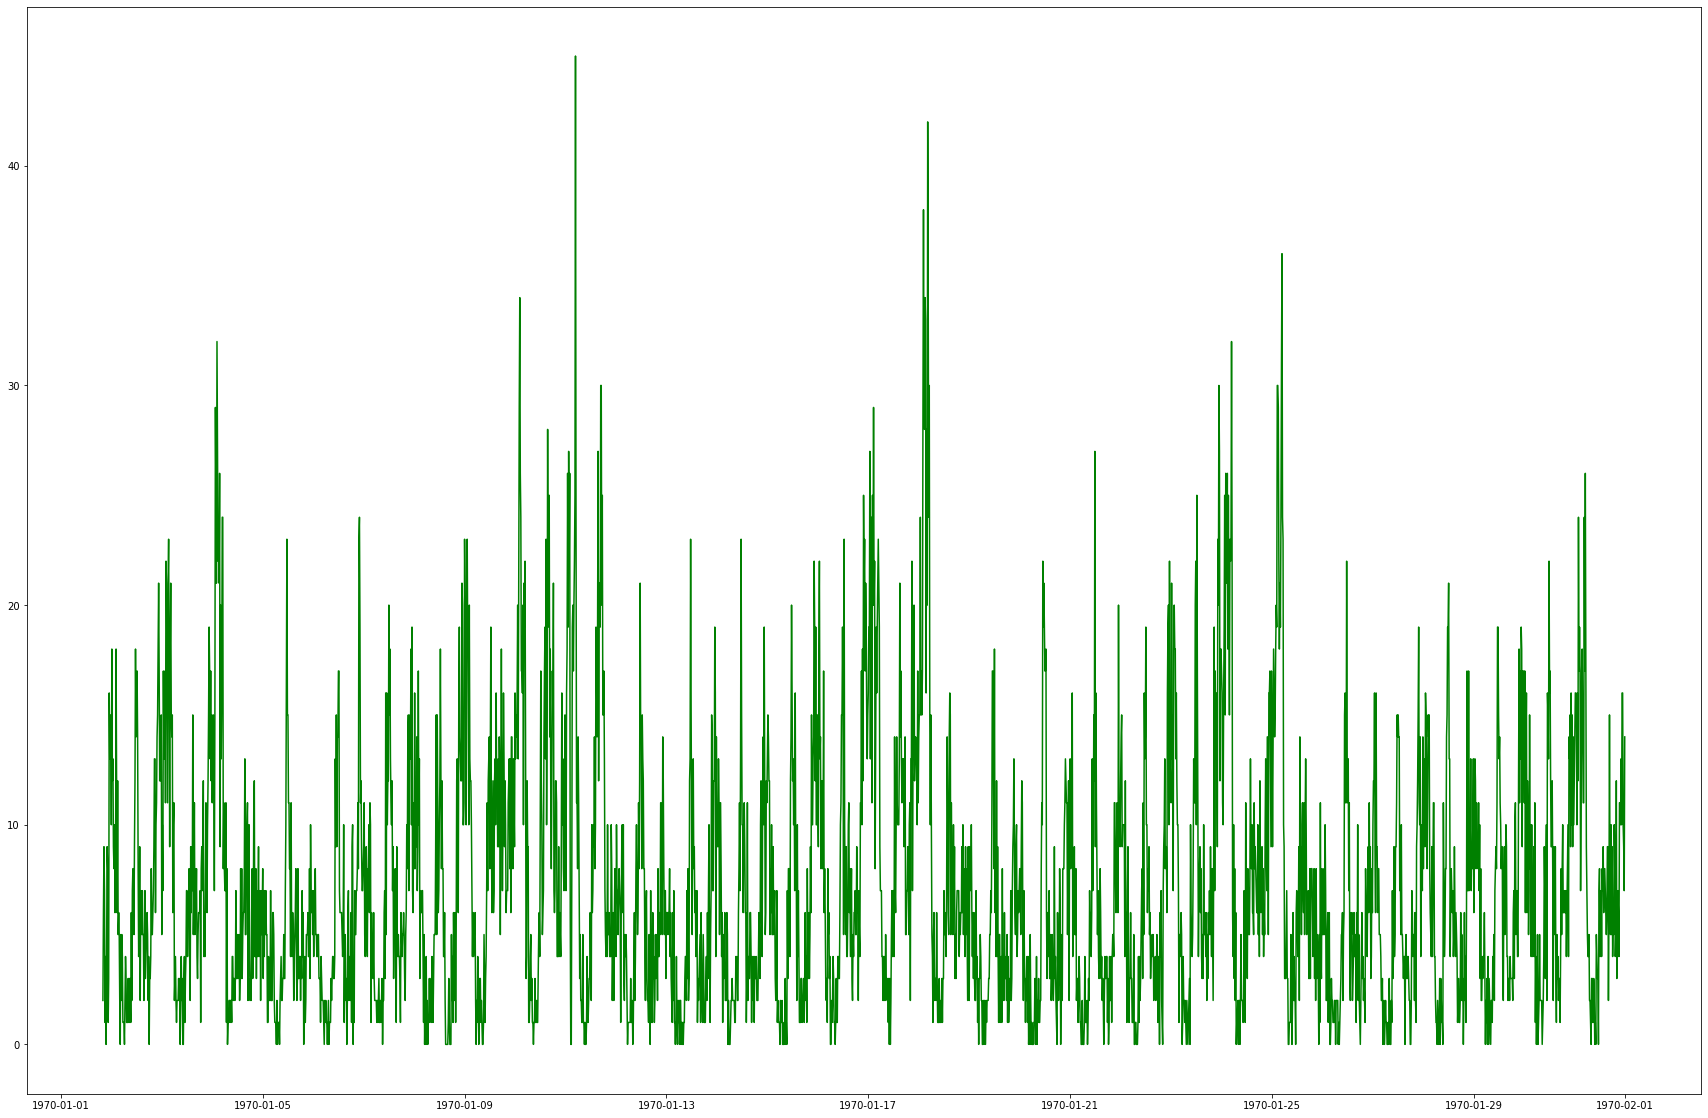

In [98]:
plt.figure(figsize = (30, 20))
plt.plot(login_data_Jan_agg_15, color='green')

In [99]:
login_data_First_Biweek = login_data.loc['Jan 1, 1970':'Jan 15, 1970']
login_data_First_Biweek_agg_15 = login_data_First_Biweek.resample('15T').sum()
login_data_First_Biweek_agg_15.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [100]:
login_data_First_Biweek_agg_15.tail()

,count
login_time,
1970-01-15 22:45:00,12
1970-01-15 23:00:00,19
1970-01-15 23:15:00,10
1970-01-15 23:30:00,10
1970-01-15 23:45:00,15


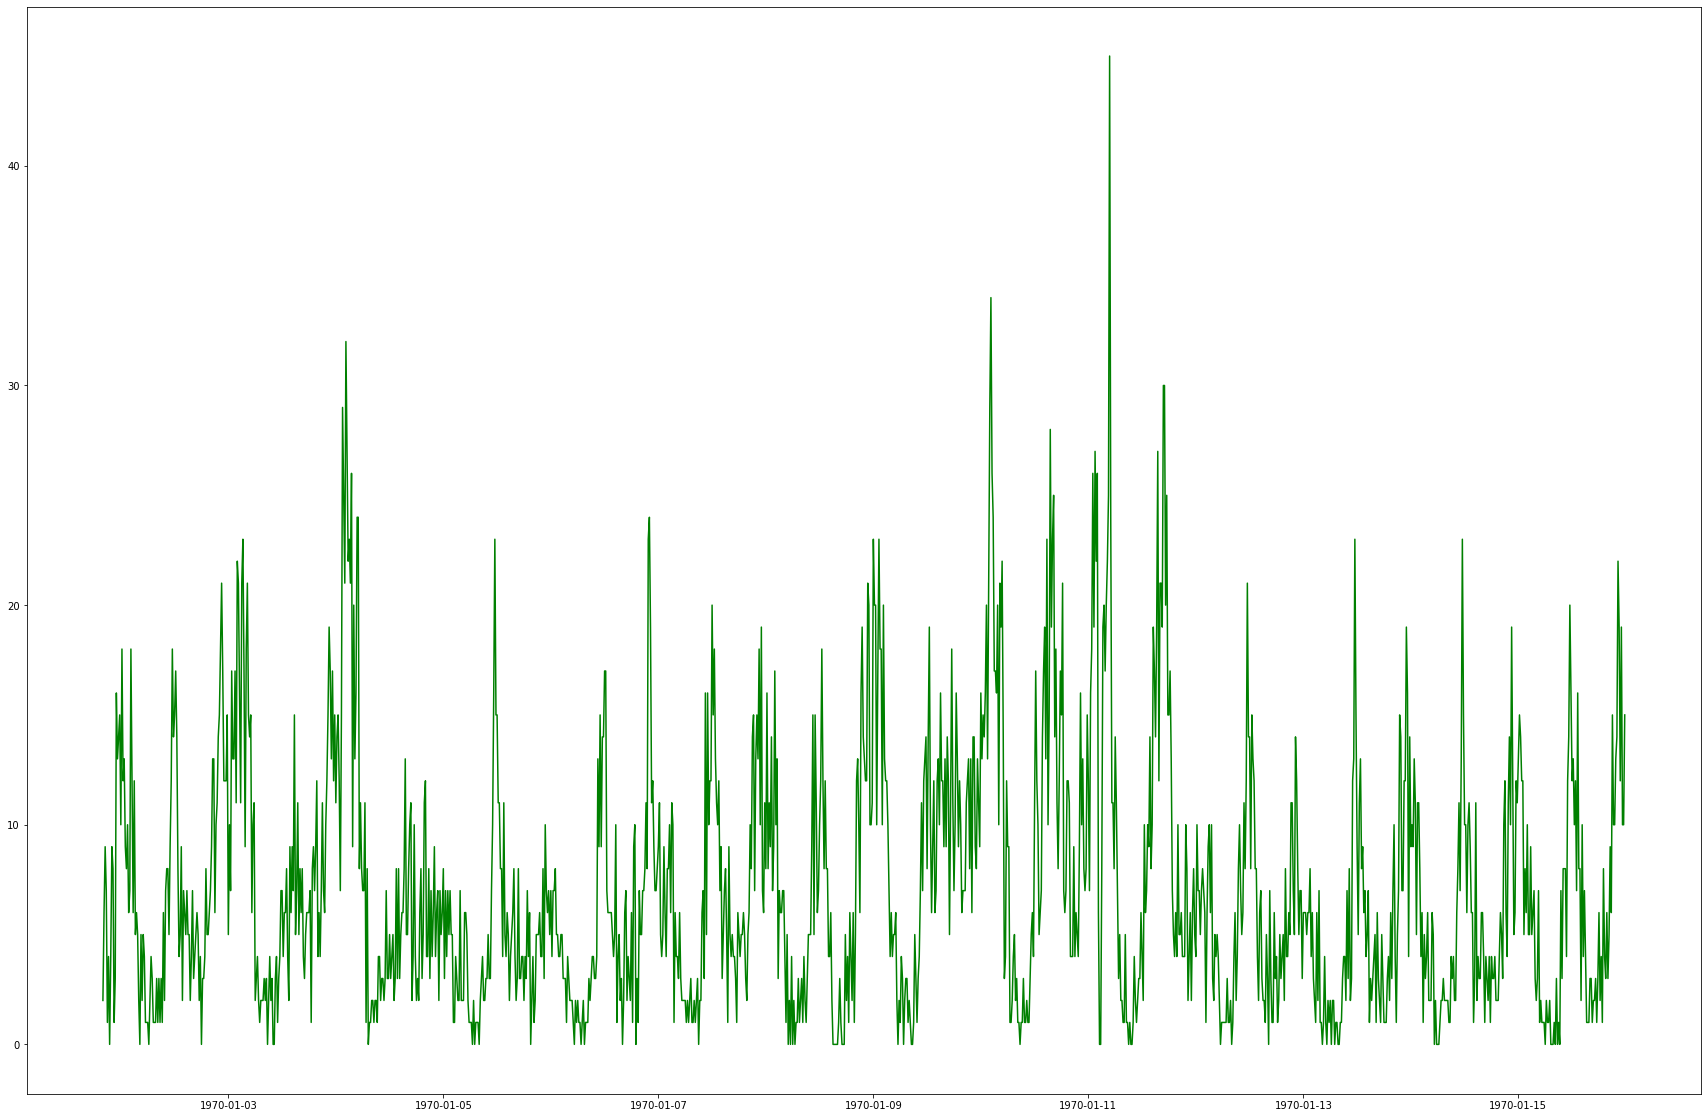

In [101]:
plt.figure(figsize = (30, 20))
plt.plot(login_data_First_Biweek_agg_15, color='green')

In [102]:
login_data_First_Week = login_data.loc['Jan 1, 1970':'Jan 7, 1970']
login_data_First_Week_agg_15 = login_data_First_Week.resample('15T').sum()
login_data_First_Week_agg_15.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [103]:
login_data_First_Week_agg_15.tail()

,count
login_time,
1970-01-07 22:45:00,10
1970-01-07 23:00:00,19
1970-01-07 23:15:00,7
1970-01-07 23:30:00,6
1970-01-07 23:45:00,11


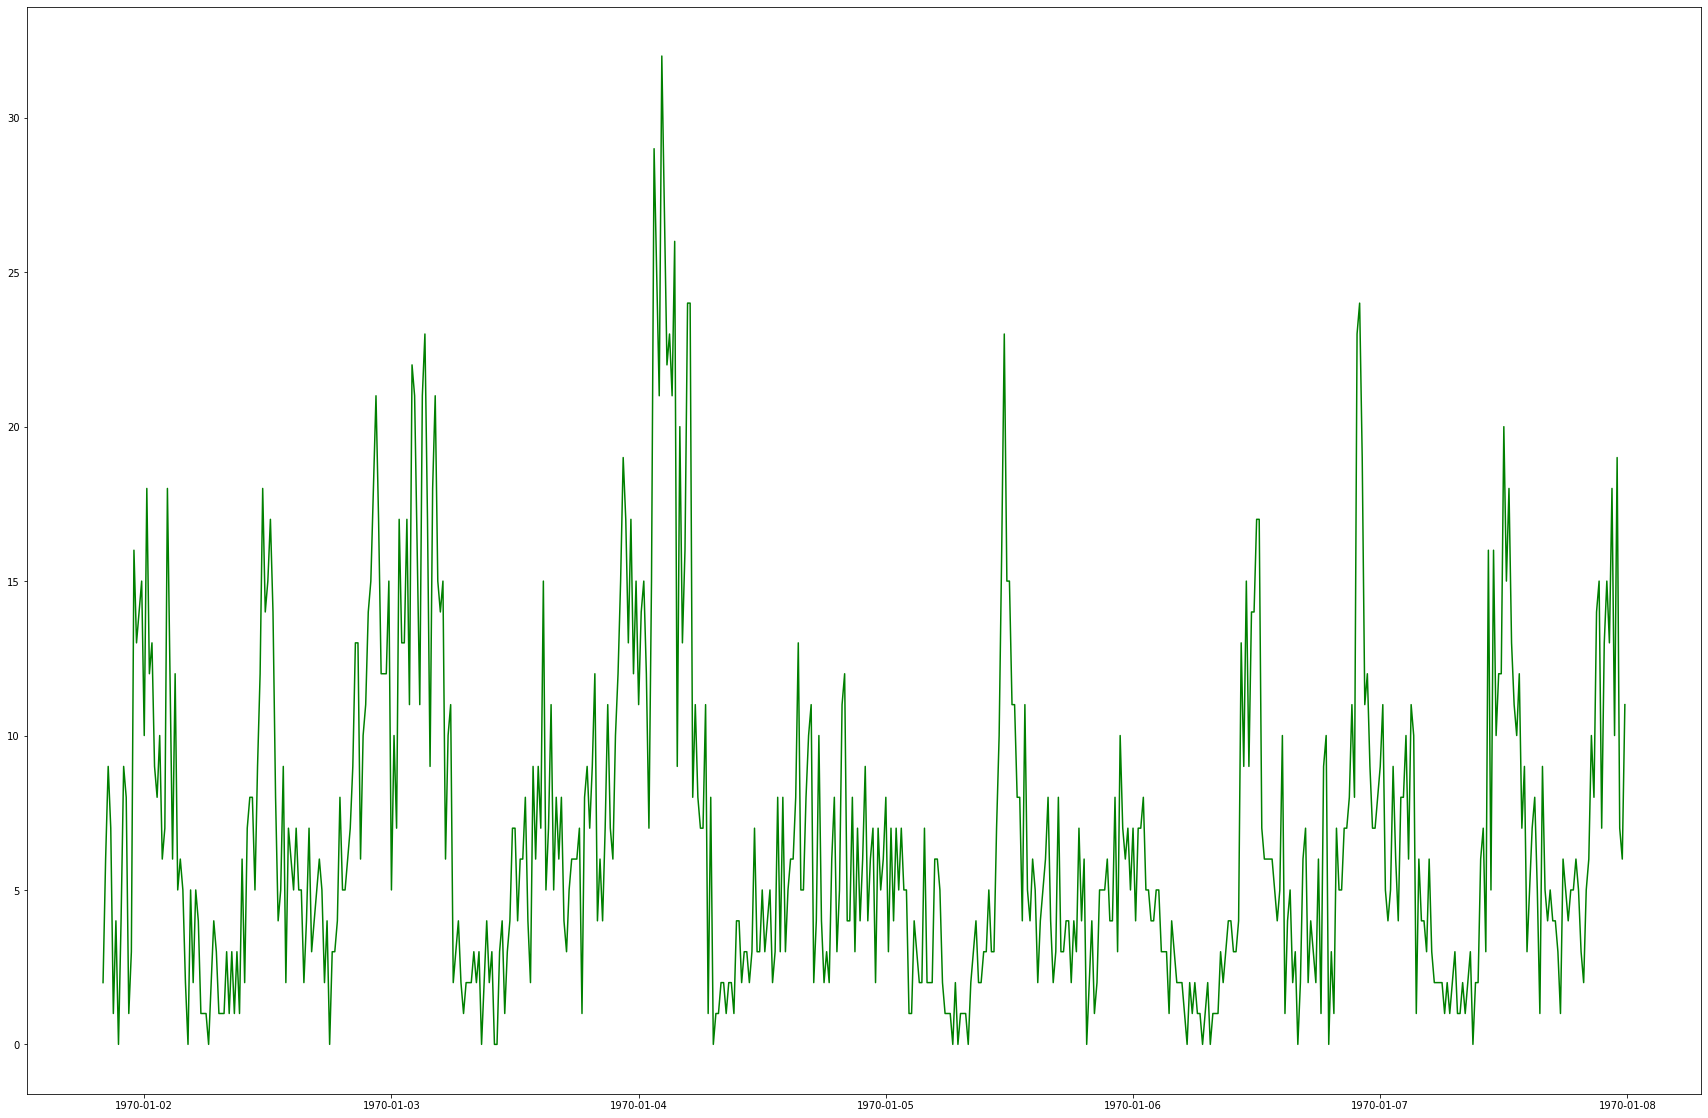

In [104]:
plt.figure(figsize = (30, 20))
plt.plot(login_data_First_Week_agg_15, color='green')

These periodic occurances may be viewed as noise which may cause models to overfit the data.  If any predictive modelling occurs, the best data to use would be the ones were the periods dissappear.  This happens when the timestamps are binned weekly.

In [105]:
login_data_Three_Days = login_data.loc['Jan 1, 1970':'Jan 7, 1970']
login_data_Three_Days_agg_15 = login_data_Three_Days.resample('15T').sum()
login_data_Three_Days_agg_15.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [106]:
login_data_Three_Days_agg_15.tail()

,count
login_time,
1970-01-07 22:45:00,10
1970-01-07 23:00:00,19
1970-01-07 23:15:00,7
1970-01-07 23:30:00,6
1970-01-07 23:45:00,11


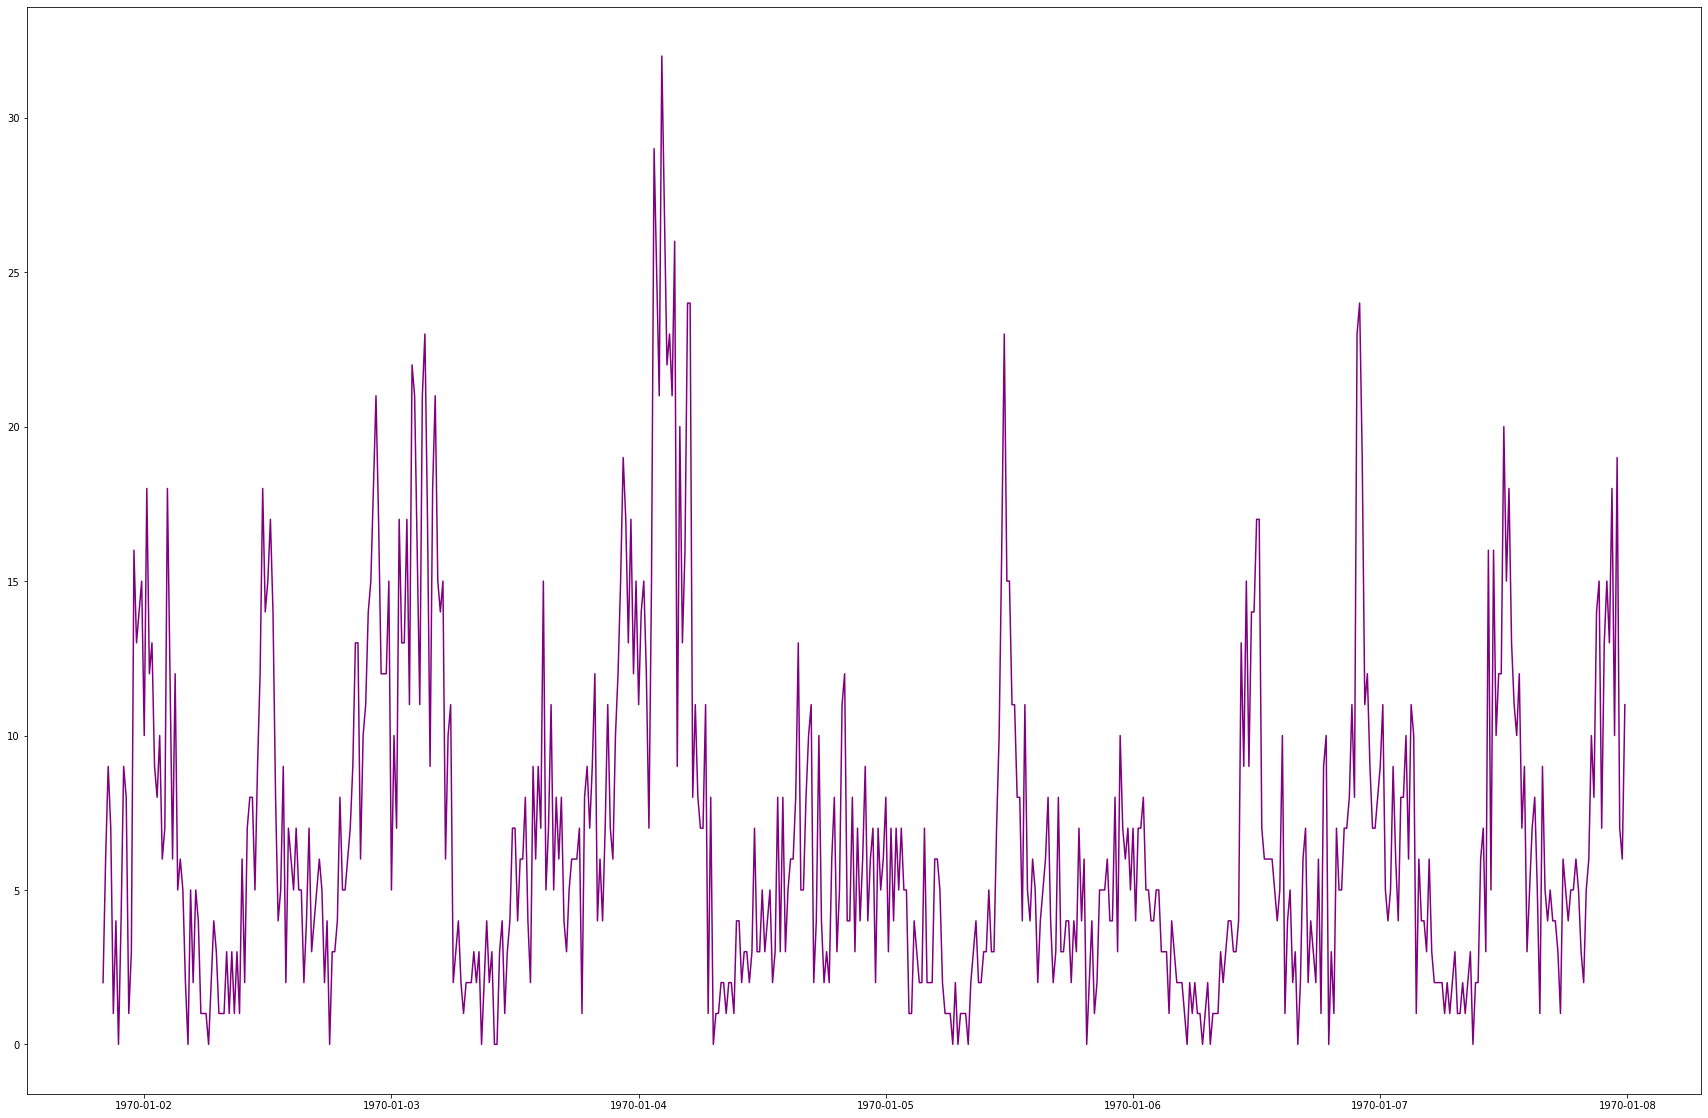

In [107]:
plt.figure(figsize = (30, 20))
plt.plot(login_data_Three_Days_agg_15, color='purple')

There seems to be periods of high volume at certain times of the day.  For the next part, I will re-create the data frame splitting up the day/night timestamps.

# Part 2: Experiment and Metric Design

In [108]:
login_data_copy = login_data = pd.read_json('logins.json') # Creating a copy of the origional data.
login_data_copy.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [109]:
login_data_copy['weekday'] = login_data_copy['login_time'].dt.dayofweek

In [110]:
login_data_copy.head() # Day of week represented categorically from 0 to 6.  Therefore the day needs to be replaced.

,login_time,weekday
0,1970-01-01 20:13:18,3
1,1970-01-01 20:16:10,3
2,1970-01-01 20:16:37,3
3,1970-01-01 20:16:36,3
4,1970-01-01 20:26:21,3


In [111]:
login_data_copy['weekday']= login_data_copy['weekday'].replace(0, 'MON')
login_data_copy['weekday']= login_data_copy['weekday'].replace(1, 'TUE')
login_data_copy['weekday']= login_data_copy['weekday'].replace(2, 'WED')
login_data_copy['weekday']= login_data_copy['weekday'].replace(3, 'THUR')
login_data_copy['weekday']= login_data_copy['weekday'].replace(4, 'FRI')
login_data_copy['weekday']= login_data_copy['weekday'].replace(5, 'SAT')
login_data_copy['weekday']= login_data_copy['weekday'].replace(6, 'SUN')
login_data_copy.head()

,login_time,weekday
0,1970-01-01 20:13:18,THUR
1,1970-01-01 20:16:10,THUR
2,1970-01-01 20:16:37,THUR
3,1970-01-01 20:16:36,THUR
4,1970-01-01 20:26:21,THUR


In [112]:
login_data_copy['hour'] = login_data_copy['login_time'].dt.hour

In [113]:
login_data_copy.head()

,login_time,weekday,hour
0,1970-01-01 20:13:18,THUR,20
1,1970-01-01 20:16:10,THUR,20
2,1970-01-01 20:16:37,THUR,20
3,1970-01-01 20:16:36,THUR,20
4,1970-01-01 20:26:21,THUR,20


In [114]:
day_night = lambda row: "Day" if row in range(6,19) else "Night"
login_data_copy["day_or_night"] = login_data_copy["hour"].apply(day_night)

In [115]:
login_data_copy.head()

,login_time,weekday,hour,day_or_night
0,1970-01-01 20:13:18,THUR,20,Night
1,1970-01-01 20:16:10,THUR,20,Night
2,1970-01-01 20:16:37,THUR,20,Night
3,1970-01-01 20:16:36,THUR,20,Night
4,1970-01-01 20:26:21,THUR,20,Night


In [116]:
login_data_copy['day_or_night'].value_counts()

Night    56546
Day      36596
Name: day_or_night, dtype: int64

The difference in activity is a key measurement in whether or not the changes to toll boths is successful.  For Ultimate Gotham, if the change is successful then there will be an increase in activity during the day and for Metropolis there will be an increase in activity at night.  The increase in activity is viewed by looking at the counts in day_or_night.

# Part 3 Predictive Modelling

## Data Import And Wrangling

In [117]:
Ultimate_Data = pd.read_json('ultimate_data_challenge.json')
Ultimate_Data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [118]:
Ultimate_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [119]:
Ultimate_Data.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

There are a few columns with missing values.  These missing values need to be filled.  Let's explore the distribution of avg_rating_of_driver to find out if the mean or median should be imputed.  There are mixed datatypes.  The city column might be an important feature.  Therefore all categorical variables will be quantized.  The datetime columns going to be used to create a new column based on whether or not the time difference between the sign_up_date and the _last_trip_date is less than 30 days.  This column will be our target variable and it will be called "Retained." All datetime object columns will be dropped afterwards.

In [120]:
Ultimate_Data['city'].value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

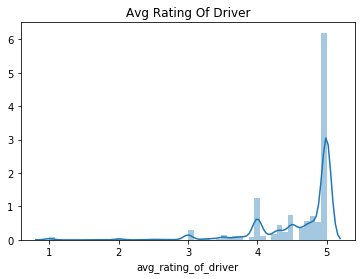

In [121]:
sns.distplot(Ultimate_Data['avg_rating_of_driver'])
plt.title("Avg Rating Of Driver")
plt.show() 

This is not a normal distribution.  There is a mode at 5, which is probably the most sensible thing to impute.  The mean will not suffice because there are too many outliers to the right.  The median suffice since there are many values at the median.  To fill in the missing values, the median will be imputed.

In [122]:
Ultimate_Data['avg_rating_of_driver'].mean()

4.6015592912744685

In [123]:
Ultimate_Data['avg_rating_of_driver'].median()

4.9

In [124]:
Ultimate_Data['avg_rating_of_driver'].fillna(Ultimate_Data['avg_rating_of_driver'].median(), inplace = True)

In [125]:
Ultimate_Data.isnull().sum()

city                        0
trips_in_first_30_days      0
signup_date                 0
avg_rating_of_driver        0
avg_surge                   0
last_trip_date              0
phone                     396
surge_pct                   0
ultimate_black_user         0
weekday_pct                 0
avg_dist                    0
avg_rating_by_driver      201
dtype: int64

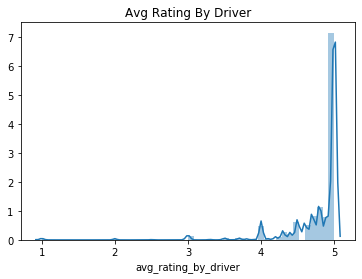

In [126]:
sns.distplot(Ultimate_Data['avg_rating_by_driver'])
plt.title("Avg Rating By Driver")
plt.show() 

Looks like the driver gave out higher scores.  In this case, the mode will be imputed just like above.

In [127]:
Ultimate_Data['avg_rating_by_driver'].fillna(Ultimate_Data['avg_rating_by_driver'].median(), inplace = True)

The 'phone' column has 396 missing values.  This number is relatively small, so the mode will be imputed.  In this case the iPhone.

This looks like a classification problem to me with the target variable being 'ultimate_black_user.'

In [128]:
Ultimate_Data['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [129]:
Ultimate_Data['phone'].fillna('iPhone', inplace = True) # Now the phone column has no missing values since the mode has been imputed.

In [130]:
Ultimate_Data.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

Now there are no missing values.

In [131]:
Ultimate_Data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [132]:
from datetime import datetime

In [133]:
Ultimate_Data['signup_date'] = Ultimate_Data['signup_date'].astype("datetime64[ns]") # Changing all date time columns into date time objects 

In [134]:
Ultimate_Data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [135]:
Ultimate_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  object        
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(6), int

In [136]:
Ultimate_Data['last_trip_date'] = Ultimate_Data['last_trip_date'].astype("datetime64[ns]")

In [137]:
Ultimate_Data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [138]:
Ultimate_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [139]:
from datetime import timedelta

In [140]:
Ultimate_Data["Retained"] = Ultimate_Data.apply(lambda row: 1 if row["last_trip_date"] - row["signup_date"] < timedelta(days = 30) else 0, axis=1)
Ultimate_Data["Target_Variable"] = Ultimate_Data.apply(lambda row: 1 if row["last_trip_date"] - row["signup_date"] > timedelta(days = 152) else 0, axis=1)

I selected the target variable to be calculated the same way as the retained column, but with a timedelta of 152 days, which is about 5 months since for 30 days without activity, the system recognizes them as active.

In [141]:
Ultimate_Data.head() # The signup date and the last trip date have the same entries, which is why the Retained column contains all 0

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Retained,Target_Variable
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,0,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,0,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0,0


In [142]:
Ultimate_Data["Retained"].value_counts() # The value of 1 indicates a timedelta between signup_date and last_trip_date greater than 30 days.
                                         # The value of 0 indicates a timedelta between signup_date and last_trip_date less than 30 days.

0    37129
1    12871
Name: Retained, dtype: int64

Now to Quantize the ultimate_black_user variable by replacing True with a 1.0 and replacing false as a 0.0

In [143]:
Ultimate_Data['ultimate_black_user'].replace(True, '1', inplace=True)
Ultimate_Data['ultimate_black_user'].replace(False, '0', inplace=True)
Ultimate_Data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Retained,Target_Variable
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,0,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0,0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0,1,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9,0,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9,0,0


In [144]:
Ultimate_Data = Ultimate_Data.drop(['signup_date', 'last_trip_date'], axis = 1)
Ultimate_Data.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Retained,Target_Variable
0,King's Landing,4,4.7,1.10,iPhone,15.4,1,46.2,3.67,5.0,0,0
1,Astapor,0,5.0,1.00,Android,0.0,0,50.0,8.26,5.0,0,0
2,Astapor,3,4.3,1.00,iPhone,0.0,0,100.0,0.77,5.0,1,0
3,King's Landing,9,4.6,1.14,iPhone,20.0,1,80.0,2.36,4.9,0,1
4,Winterfell,14,4.4,1.19,Android,11.8,0,82.4,3.13,4.9,0,0


In [145]:
Ultimate_Data = pd.get_dummies(Ultimate_Data) # Converting the rest of the data into numerical values
Ultimate_Data.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,Retained,Target_Variable,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_0,ultimate_black_user_1
0,4,4.7,1.10,15.4,46.2,3.67,5.0,0,0,0,1,0,0,1,0,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,0,1,0,0,1,0,1,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,1,0,1,0,0,0,1,1,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,0,1,0,1,0,0,1,0,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,0,0,0,1,1,0,1,0


In [146]:
Ultimate_Data.astype("float64")

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,Retained,Target_Variable,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_0,ultimate_black_user_1
0,4.0,4.7,1.10,15.4,46.2,3.67,5.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.0,5.0,1.00,0.0,50.0,8.26,5.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,3.0,4.3,1.00,0.0,100.0,0.77,5.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,9.0,4.6,1.14,20.0,80.0,2.36,4.9,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,14.0,4.4,1.19,11.8,82.4,3.13,4.9,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,5.0,1.00,0.0,100.0,5.63,4.2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
49996,1.0,4.9,1.00,0.0,0.0,0.00,4.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
49997,0.0,5.0,1.00,0.0,100.0,3.86,5.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
49998,2.0,3.0,1.00,0.0,100.0,4.58,3.5,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [147]:
Ultimate_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  50000 non-null  int64  
 1   avg_rating_of_driver    50000 non-null  float64
 2   avg_surge               50000 non-null  float64
 3   surge_pct               50000 non-null  float64
 4   weekday_pct             50000 non-null  float64
 5   avg_dist                50000 non-null  float64
 6   avg_rating_by_driver    50000 non-null  float64
 7   Retained                50000 non-null  int64  
 8   Target_Variable         50000 non-null  int64  
 9   city_Astapor            50000 non-null  uint8  
 10  city_King's Landing     50000 non-null  uint8  
 11  city_Winterfell         50000 non-null  uint8  
 12  phone_Android           50000 non-null  uint8  
 13  phone_iPhone            50000 non-null  uint8  
 14  ultimate_black_user_0   50000 non-null

In [148]:
Ultimate_Data['trips_in_first_30_days'] = Ultimate_Data['trips_in_first_30_days'].astype("float64")
Ultimate_Data['Retained'] = Ultimate_Data["Retained"].astype('float64')

In [149]:
Ultimate_Data.info() # Now all types that are float64 can be used in a heatmap correlation chart to find correlations between variables.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  50000 non-null  float64
 1   avg_rating_of_driver    50000 non-null  float64
 2   avg_surge               50000 non-null  float64
 3   surge_pct               50000 non-null  float64
 4   weekday_pct             50000 non-null  float64
 5   avg_dist                50000 non-null  float64
 6   avg_rating_by_driver    50000 non-null  float64
 7   Retained                50000 non-null  float64
 8   Target_Variable         50000 non-null  int64  
 9   city_Astapor            50000 non-null  uint8  
 10  city_King's Landing     50000 non-null  uint8  
 11  city_Winterfell         50000 non-null  uint8  
 12  phone_Android           50000 non-null  uint8  
 13  phone_iPhone            50000 non-null  uint8  
 14  ultimate_black_user_0   50000 non-null

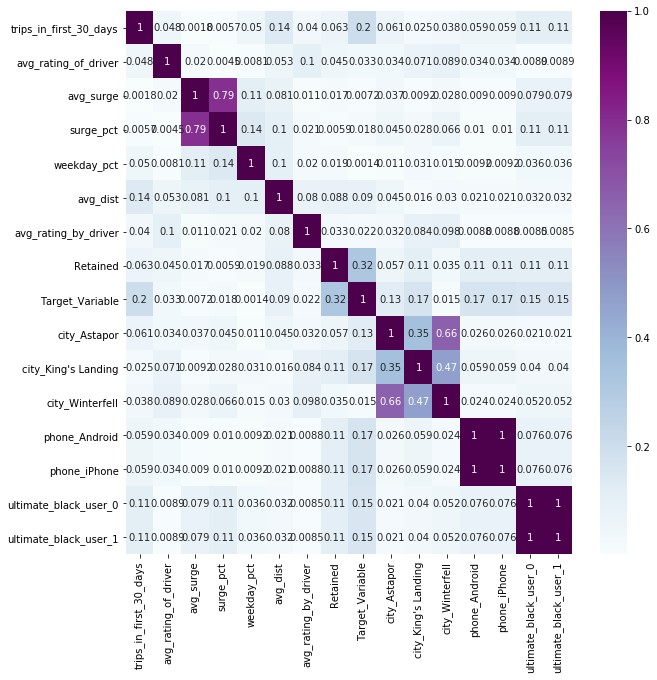

In [150]:
plt.figure(figsize = (10, 10))
Ultimate_Data.corr().abs()
z = Ultimate_Data.corr().abs()
sns.heatmap(data=z, annot=True, cmap='BuPu')
plt.savefig('Correlation Heatmap.png')

In [151]:
Ultimate_Data_Copy = Ultimate_Data.drop(["city_Astapor", "city_King's Landing", "city_Winterfell", "phone_Android", "phone_iPhone", "ultimate_black_user_0", "ultimate_black_user_1"], axis = 1)

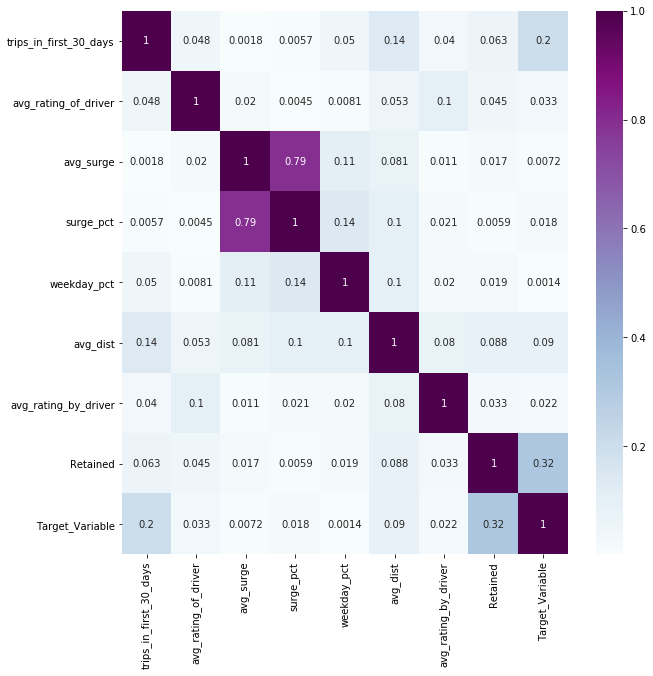

In [152]:
plt.figure(figsize = (10, 10)) # All the dummy variables have been dropped in this copy.
Ultimate_Data_Copy.corr().abs()
z = Ultimate_Data_Copy.corr().abs()
sns.heatmap(data=z, annot=True, cmap='BuPu')
plt.savefig('Correlation Heatmap.png')

Strong correlation between surge_pct and avg_surge.  There are lots of weaker correlations, but some notable ones would be the rating of the driver and the rating by the driver and the values between trips in the first 30 as well as average dist.  There is also a stronger correlation between retained and the target variable.  People who make frequent trips in the first 30 days stand a higher chance at being active after 6 months.

Now the data is ready for a classification algorithm where a LogisticRegression will be done.  The data will be split up into training and testing datasets preceeding the splitting up of the target variable and the remaining columns in the table as X and y respectively.

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [154]:
X = Ultimate_Data.drop(['Target_Variable'], axis = 1)
y = Ultimate_Data['Target_Variable']

In [155]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size = 0.3) # Splitting up our training data into training/testing data.

In [156]:
Model = LogisticRegression() # This is a Logistic Regression Model
Model.fit(X_train, X_test)

C:\Users\Matt\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [157]:
pred_y = Model.predict(y_train)
pred_y # As expected, This array represents the predicted target variable from the y_train data information.

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [158]:
accuracy_score(y_test, pred_y)

0.7906666666666666

In [ ]:
This logistic regression model is right 80% of the time, which is a good model.